In [1]:
!pip install scikit-learn
!pip install matplotlib

In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import sklearn as skl  # Correct import statement
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm  # Fix import statements
from sklearn.model_selection import train_test_split  # Fix import statement


In [3]:
# checking all packages are installed

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image . The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.


digits0 row0: 0.0	0.0	5.0	13.0	9.0	1.0	0.0	0.0
digits0 row1: 0.0	0.0	0.0	12.0	13.0	5.0	0.0	0.0
digits0 row2: 0.0	0.0	0.0	4.0	15.0	12.0	0.0	0.0
digits0 row3: 0.0	0.0	7.0	15.0	13.0	1.0	0.0	0.0
digits0 row4: 0.0	0.0	0.0	1.0	11.0	0.0	0.0	0.0
digits0 row5: 0.0	0.0	12.0	10.0	0.0	0.0	0.0	0.0
digits0 row6: 0.0	0.0	0.0	12.0	13.0	0.0	0.0	0.0
digits0 row7: 0.0	0.0	7.0	8.0	13.0	16.0	15.0	1.0


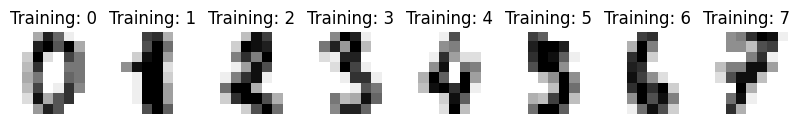

In [26]:
digits = datasets.load_digits()
#first object is 0 which printed like this.
print(f"digits0 row0: {digits['data'][0][0]}\t{digits['data'][0][1]}\t{digits['data'][0][2]}\t{digits['data'][0][3]}\t{digits['data'][0][4]}\t{digits['data'][0][5]}\t{digits['data'][0][6]}\t{digits['data'][0][7]}")

print(f"digits0 row1: {digits['data'][1][0]}\t{digits['data'][1][1]}\t{digits['data'][1][2]}\t{digits['data'][1][3]}\t{digits['data'][1][4]}\t{digits['data'][1][5]}\t{digits['data'][1][6]}\t{digits['data'][1][7]}")

print(f"digits0 row2: {digits['data'][2][0]}\t{digits['data'][2][1]}\t{digits['data'][2][2]}\t{digits['data'][2][3]}\t{digits['data'][2][4]}\t{digits['data'][2][5]}\t{digits['data'][2][6]}\t{digits['data'][2][7]}")

print(f"digits0 row3: {digits['data'][3][0]}\t{digits['data'][3][1]}\t{digits['data'][3][2]}\t{digits['data'][3][3]}\t{digits['data'][3][4]}\t{digits['data'][3][5]}\t{digits['data'][3][6]}\t{digits['data'][3][7]}")

print(f"digits0 row4: {digits['data'][4][0]}\t{digits['data'][4][1]}\t{digits['data'][4][2]}\t{digits['data'][4][3]}\t{digits['data'][4][4]}\t{digits['data'][4][5]}\t{digits['data'][4][6]}\t{digits['data'][4][7]}")

print(f"digits0 row5: {digits['data'][5][0]}\t{digits['data'][5][1]}\t{digits['data'][5][2]}\t{digits['data'][5][3]}\t{digits['data'][5][4]}\t{digits['data'][5][5]}\t{digits['data'][5][6]}\t{digits['data'][5][7]}")

print(f"digits0 row6: {digits['data'][6][0]}\t{digits['data'][6][1]}\t{digits['data'][6][2]}\t{digits['data'][6][3]}\t{digits['data'][6][4]}\t{digits['data'][6][5]}\t{digits['data'][6][6]}\t{digits['data'][6][7]}")

print(f"digits0 row7: {digits['data'][7][0]}\t{digits['data'][7][1]}\t{digits['data'][7][2]}\t{digits['data'][7][3]}\t{digits['data'][7][4]}\t{digits['data'][7][5]}\t{digits['data'][7][6]}\t{digits['data'][7][7]}")



_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



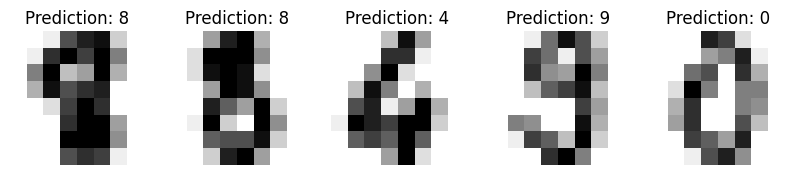

In [6]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

##### :func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [7]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


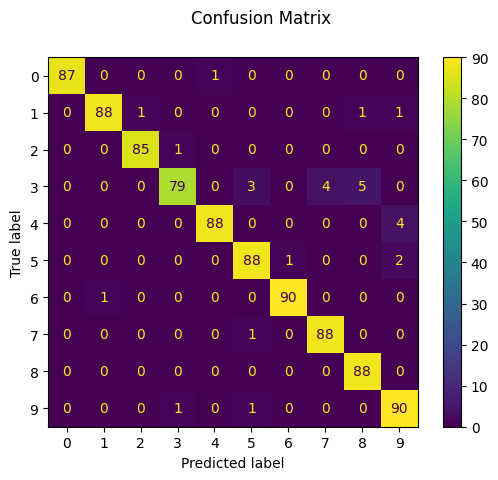

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

If the results from evaluating a classifier are stored in the form of a
`confusion matrix <confusion_matrix>` and not in terms of `y_true` and
`y_pred`, one can still build a :func:`~sklearn.metrics.classification_report`
as follows:



In [9]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


